In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import dask
import dask.dataframe as dd

#### Import my subset using Dask

In [40]:
#my subset
df1 = dd.read_csv('accepted_2007_to_2018Q4.csv', usecols=['acc_now_delinq','acc_open_past_24mths','addr_state','all_util',
                'annual_inc','annual_inc_joint','application_type','avg_cur_bal',
                'bc_open_to_buy','bc_util','chargeoff_within_12_mths','collection_recovery_fee',
                'collections_12_mths_ex_med','debt_settlement_flag','debt_settlement_flag_date',
                'deferral_term','delinq_2yrs','delinq_amnt','disbursement_method',
                'dti','dti_joint','earliest_cr_line','emp_length','emp_title',
                'fico_range_high','fico_range_low','funded_amnt','funded_amnt_inv',
                'grade','int_rate','loan_status'], low_memory = False)

In [41]:
df1.head()

,funded_amnt,funded_amnt_inv,int_rate,grade,emp_title,emp_length,annual_inc,loan_status,addr_state,dti,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,deferral_term,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,3600.0,3600.0,13.99,C,leadman,10+ years,55000.0,Fully Paid,PA,5.91,...,4.0,20701.0,1506.0,37.2,0.0,0.0,NaN,Cash,N,NaN
1,24700.0,24700.0,11.99,C,Engineer,10+ years,65000.0,Fully Paid,SD,16.06,...,4.0,9733.0,57830.0,27.1,0.0,0.0,NaN,Cash,N,NaN
2,20000.0,20000.0,10.78,B,truck driver,10+ years,63000.0,Fully Paid,IL,10.78,...,6.0,31617.0,2737.0,55.9,0.0,0.0,NaN,Cash,N,NaN
3,35000.0,35000.0,14.85,C,Information Systems Officer,10+ years,110000.0,Current,NJ,17.06,...,2.0,23192.0,54962.0,12.1,0.0,0.0,NaN,Cash,N,NaN
4,10400.0,10400.0,22.45,F,Contract Specialist,3 years,104433.0,Fully Paid,PA,25.37,...,10.0,27644.0,4567.0,77.5,0.0,0.0,NaN,Cash,N,NaN


In [42]:
#check datatypes
df1.dtypes

funded_amnt                   float64
funded_amnt_inv               float64
int_rate                      float64
grade                          object
emp_title                      object
emp_length                     object
annual_inc                    float64
loan_status                    object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
application_type               object
annual_inc_joint              float64
dti_joint                     float64
acc_now_delinq                float64
all_util                      float64
acc_open_past_24mths          float64
avg_cur_bal                   float64
bc_open_to_buy                float64
bc_util                       float64
chargeoff_within_12_mths      float64
delinq_amnt 

## Evaluate each feature

In [249]:
df1['acc_now_delinq'].value_counts().compute()
#missingness is from 33 bad ids

0.0     2251857
1.0        8293
2.0         421
3.0          50
4.0          11
5.0           3
6.0           2
14.0          1
7.0           1
Name: acc_now_delinq, dtype: int64

In [251]:
df1['acc_open_past_24mths'].describe().compute()
#2.214% missing

count    2.210638e+06
mean     4.521656e+00
std      3.164229e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      6.400000e+01
Name: acc_open_past_24mths, dtype: float64

In [47]:
#impute using mean of each loan_status
df1[['loan_status', 'acc_open_past_24mths']].dropna().groupby('loan_status').mean().compute()

,acc_open_past_24mths
loan_status,
Charged Off,5.326243
Current,4.249941
Default,5.475000
Fully Paid,4.532947
In Grace Period,4.799431
Late (16-30 days),4.913543
Late (31-120 days),5.095821


### State

In [52]:
df1.addr_state.value_counts().compute()
#need to dumify

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

### Balance to credit limit on all trades
##### 38% missing
starts after 2015

In [58]:
#impute using mean of each loan_status
util_means = df1[['loan_status', 'all_util']].dropna().groupby('loan_status').mean().compute()
util_means

,all_util
loan_status,
Charged Off,61.650892
Current,56.196456
Fully Paid,57.176862
In Grace Period,60.916808
Late (16-30 days),58.829213
Late (31-120 days),58.935312
Default,54.631579


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Charged Off'),
  Text(3, 0, 'In Grace Period'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'Late (16-30 days)'),
  Text(6, 0, 'Default')])

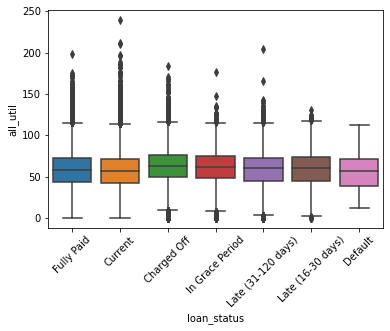

In [69]:
util_box = df1[['loan_status', 'all_util']].dropna().compute()
sns.boxplot(x='loan_status', y="all_util", data=util_box)
plt.xticks(rotation=45)

In [55]:
df1['all_util'].describe().compute()

count    1.394320e+06
mean     5.703230e+01
std      2.090475e+01
min      0.000000e+00
25%      4.800000e+01
50%      6.200000e+01
75%      7.500000e+01
max      2.390000e+02
Name: all_util, dtype: float64

### Annual Income

In [71]:
df1['annual_inc'].describe().compute()

count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      5.000000e+04
50%      7.000000e+04
75%      9.889575e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

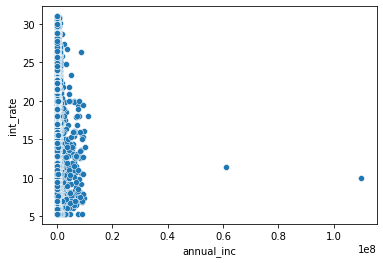

In [72]:
sns.scatterplot(x='annual_inc',y='int_rate', data=df1.compute())

In [73]:
#Drop 2 outliers
df1= df1[df1.annual_inc < .4e8]

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

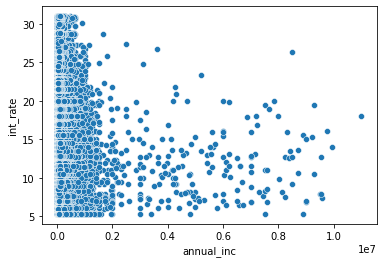

In [74]:
sns.scatterplot(x='annual_inc',y='int_rate', data=df1.compute())

In [159]:
sum(df1['annual_inc'].isnull().compute())

0

In [78]:
df1['annual_inc_joint'].describe().compute()

count    1.207100e+05
mean     1.236246e+05
std      7.416135e+04
min      5.693510e+03
25%      8.900000e+04
50%      1.200000e+05
75%      1.637425e+05
max      7.874821e+06
Name: annual_inc_joint, dtype: float64

In [ ]:
#combine- use inc joint if it exists

- 94% missing in annual_inc_joint

#### Application Type

In [79]:
df1['application_type'].value_counts().compute()

Individual    2139952
Joint App      120710
Name: application_type, dtype: int64

In [165]:
#covert to binary
#df1['application_type_indiv']= dd.from_array(np.where(df1['application_type'] =='Individual',1,0))


#### Average current balance of all accounts

In [85]:
df1['avg_cur_bal'].describe().compute()

count    2.190320e+06
mean     1.354781e+04
std      1.647408e+04
min      0.000000e+00
25%      3.367000e+03
50%      8.120000e+03
75%      1.985475e+04
max      9.580840e+05
Name: avg_cur_bal, dtype: float64

In [90]:
sum(df1['avg_cur_bal'].isnull().compute())

70342

In [93]:
df1[['loan_status', 'avg_cur_bal']].dropna().groupby('loan_status').mean().compute()

,avg_cur_bal
loan_status,
Charged Off,10934.066703
Current,13668.869174
Default,12363.625000
Fully Paid,14135.645106
In Grace Period,14037.810692
Late (16-30 days),12719.144631
Late (31-120 days),12095.731576


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Charged Off'),
  Text(3, 0, 'In Grace Period'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'Late (16-30 days)'),
  Text(6, 0, 'Default')])

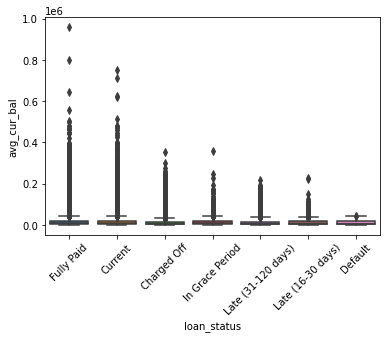

In [92]:
cur_bal_box = df1[['loan_status', 'avg_cur_bal']].dropna().compute()
sns.boxplot(x='loan_status', y='avg_cur_bal', data=cur_bal_box)
plt.xticks(rotation=45)

In [ ]:
#log?

#### Total open to buy on revolving bankcards

In [94]:
df1['bc_open_to_buy'].value_counts().compute()

0.0         30767
500.0        1954
2000.0       1908
1000.0       1709
3000.0       1580
            ...  
78675.0         1
78674.0         1
78668.0         1
78667.0         1
711140.0        1
Name: bc_open_to_buy, Length: 91500, dtype: int64

In [151]:
sum(df1['bc_open_to_buy'].isnull().compute())

74931

#### Ratio of total current balance to high credit/credit limit for all bankcard accounts.

In [95]:
df1['bc_util'].value_counts().compute()

0.0      27885
98.0      6188
97.0      5748
99.0      5700
96.0      5642
         ...  
145.7        1
145.8        1
146.0        1
146.2        1
339.6        1
Name: bc_util, Length: 1494, dtype: int64

In [97]:
sum(df1['bc_util'].isnull().compute())

76067

#### # of chargeoffs & # of collections

In [98]:
df1['chargeoff_within_12_mths'].value_counts().compute()

0.0     2243337
1.0       15765
2.0        1115
3.0         186
4.0          68
5.0          22
6.0          12
7.0           8
9.0           5
8.0           2
10.0          1
Name: chargeoff_within_12_mths, dtype: int64

In [108]:
df1['collections_12_mths_ex_med'].value_counts().compute()

0.0     2223083
1.0       34684
2.0        2313
3.0         271
4.0          93
5.0          36
6.0          17
7.0           7
9.0           4
8.0           4
20.0          2
12.0          2
10.0          2
16.0          1
14.0          1
11.0          1
Name: collections_12_mths_ex_med, dtype: int64

- 99%, 98% of non-null values are 0 
- both have 141 missings - drop

#### Disbursement method

In [117]:
df1['disbursement_method'].value_counts().compute()

Cash         2182540
DirectPay      78122
Name: disbursement_method, dtype: int64

In [203]:
## Make disbursement method binary
#subset['disbursement_method']= [1 if x =='Cash' else 0 for x in subset['disbursement_method']]
#subset.rename(columns = {'disbursement_method': 'disbursement_method_cash'}, inplace = True)

In [148]:
sum(df1['disbursement_method'].isnull().compute())

0

#### DTI

In [142]:
sum(df1['dti'].isnull().compute())

1711

In [152]:
df1['dti_joint'].describe().compute()

count    120706.000000
mean         19.251817
std           7.822086
min           0.000000
25%          14.187500
50%          19.400000
75%          25.350000
max          69.490000
Name: dti_joint, dtype: float64

In [119]:
df1['dti_joint'].value_counts().compute()

17.32    80
22.39    77
19.89    77
18.10    77
18.96    76
         ..
46.84     1
46.86     1
48.58     1
49.45     1
69.49     1
Name: dti_joint, Length: 4018, dtype: int64

In [145]:
sum(df1['dti_joint'].isnull().compute())

2139956

- 94% missing - impute 0 for not joint?

#### Earliest reported credit line opened

In [120]:
df1['earliest_cr_line'].value_counts().compute()

Sep-2004    15400
Sep-2003    15215
Sep-2005    14780
Aug-2003    14669
Aug-2004    14413
            ...  
May-1950        1
Jan-1946        1
Mar-1958        1
Oct-1957        1
Mar-1957        1
Name: earliest_cr_line, Length: 754, dtype: int64

In [140]:
#need to change format
df1['earliest_cr_line']=dd.to_datetime(df1.earliest_cr_line,unit='ns')

In [141]:
df1['earliest_cr_line'].value_counts().compute()

2004-09-01    15400
2003-09-01    15215
2005-09-01    14780
2003-08-01    14669
2004-08-01    14413
              ...  
1957-08-01        1
1957-09-01        1
1951-12-01        1
1951-09-01        1
1933-03-01        1
Name: earliest_cr_line, Length: 754, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line'>

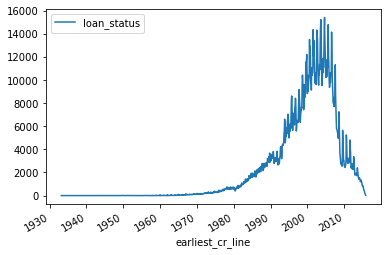

In [157]:
df1[['earliest_cr_line','loan_status']].groupby(['earliest_cr_line']).count().compute().plot()

In [139]:
sum(df1['earliest_cr_line'].isnull().compute())

25

### Professions

- need to deal with emp_title

In [112]:
df1['emp_length'].value_counts().compute()

10+ years    748003
2 years      203677
< 1 year     189984
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [195]:
#covert to ordinal
#subset.emp_length.replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3,'4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10}, inplace=True)

In [115]:
sum(df1['emp_length'].isnull().compute())

146907

### Fico

In [153]:
df1['fico_range_high'].describe().compute()

count    2.260662e+06
mean     7.025883e+02
std      3.301107e+01
min      6.140000e+02
25%      6.840000e+02
50%      7.090000e+02
75%      7.390000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

In [154]:
sum(df1['fico_range_high'].isnull().compute())

0

In [155]:
sum(df1['fico_range_low'].isnull().compute())

0

### Grade 
#### Remove F and G grade?

In [123]:
df1['grade'].value_counts().compute()

B    663555
C    650053
A    433023
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [131]:
sum(df1['grade'].isnull().compute())

0

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

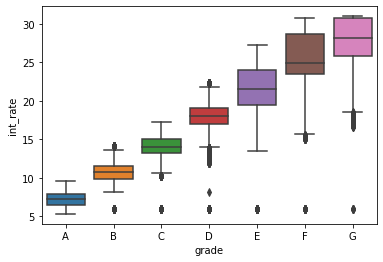

In [124]:
my_order = ['A','B','C','D','E','F','G']
sns.boxplot(x='grade', y='int_rate', data=df1.compute(), order=my_order)

In [ ]:
#remove?
#df1 = df1[(df1.grade != 'F') & (df1.grade != 'G')]

In [207]:
#covert to ordinal
#df1.grade.replace({'G':1,'F':2,'E':3, 'D':4, 'C':5, 'B':6, 'A':7}, inplace=True)